In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
model_metrics = pd.read_csv('../data/model_results/linearregressor-20210801T081346/model_metrics.csv')
trading_history = pd.read_csv('../data/model_results/linearregressor-20210801T081346/trading_history.csv')

In [25]:
trading_history.head()

,action,amount_of_eth_to_exchange,amount_of_usd_to_exchange,eth_wallet_balance,total_money,total_assets
0,buy,0.019285,10.000,0.019285,90.000,100.000000
1,buy,0.017268,9.000,0.036553,81.000,100.051298
2,sell,0.015376,8.100,0.021176,89.100,100.255262
3,sell,0.016977,8.910,0.004200,98.010,100.214180
4,buy,0.018817,9.801,0.023017,88.209,100.197423


In [26]:
trading_history['total_assets'].describe()

count    336.000000
mean     115.149482
std        9.257244
min      100.000000
25%      105.842921
50%      119.611818
75%      123.404500
max      129.789434
Name: total_assets, dtype: float64

In [27]:
# calculate hourly logarithmic return
trading_history['returns'] = np.log(trading_history.total_assets / trading_history.total_assets.shift(-1))
      
# calculate daily standard deviation of returns
hourly_std = np.std(
    np.log(
        trading_history.total_assets / trading_history.total_assets.shift(-1)
    )
)
  
# annualized daily standard deviation
annualized_std = hourly_std * np.sqrt(365)
annualized_std

0.13504948625008356

In [34]:
def annualized_std(series: pd.Series):
    """
    Calculates the annualized standard deviation of an hourly 
    pandas Series that has been sorted in ascending time series
    order.
    """
    
    log_differential = np.log(series / series.shift(-1))
    hourly_std = np.std(log_differential)
    annualized_std = hourly_std * np.sqrt(365)
    return annualized_std    

In [36]:
annualized_std(trading_history['total_assets'])

0.13504948625008356

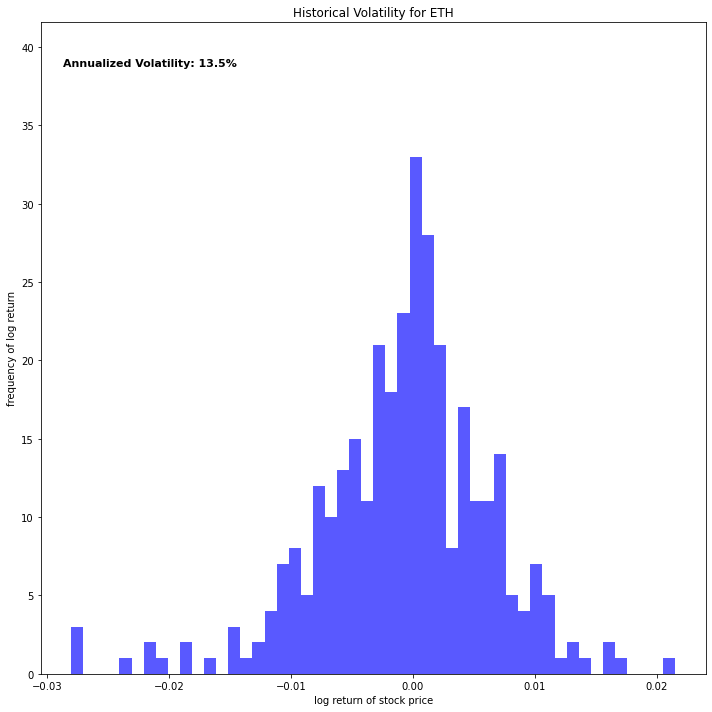

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
n, bins, patches = ax.hist(
    trading_history.returns.values,
    bins=50, alpha=0.65, color='blue')
 
ax.set_xlabel('log return of stock price')
ax.set_ylabel('frequency of log return')
ax.set_title('Historical Volatility for ETH')
  
# get x and y coordinate limits
x_corr = ax.get_xlim()
y_corr = ax.get_ylim()
  
# make room for text
header = y_corr[1] / 5
y_corr = (y_corr[0], y_corr[1] + header)
ax.set_ylim(y_corr[0], y_corr[1])
 
# print historical volatility on plot
x = x_corr[0] + (x_corr[1] - x_corr[0]) / 30
y = y_corr[1] - (y_corr[1] - y_corr[0]) / 15
ax.text(x, y, 'Annualized Volatility: ' + str(np.round(std*100, 1))+'%', fontsize=11, fontweight='bold')

x = x_corr[0] + (x_corr[1] - x_corr[0]) / 15

y -= (y_corr[1] - y_corr[0]) / 20
 
# save histogram plot of historical price volatility
fig.tight_layout()

In [32]:
y

36.729